Keval Shah


60009220061


IPCV lab 7

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def plot_images(original, filtered, title_filtered):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(original, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(filtered, cmap='gray')
    plt.title(title_filtered)
    plt.axis('off')

    plt.show()

In [4]:
scribble = cv2.imread('/content/potrait.png')
g = cv2.cvtColor(scribble, cv2.COLOR_BGR2GRAY)

In [5]:
g.shape

(710, 474)

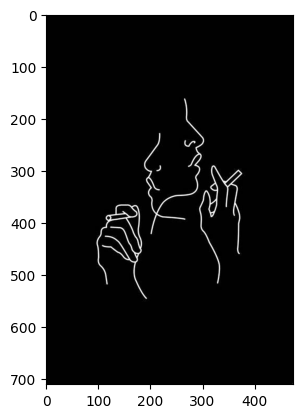

In [6]:
plt.imshow(g,cmap="gray")

In [7]:
def create_cross_structuring_element(size):
    if size % 2 == 0:
        raise ValueError("Size must be an odd integer.")

    element = np.zeros((size, size), dtype=np.uint8)
    center = size // 2
    element[center, :] = 1
    element[:, center] = 1
    return 1 - element

In [8]:
def erode(image, kernel):
    img_height, img_width = image.shape
    kernel_height, kernel_width = kernel.shape

    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=0)
    eroded_image = np.zeros_like(image)

    for i in range(img_height):
        for j in range(img_width):
            region = padded_image[i:i + kernel_height, j:j + kernel_width]
            if np.all(region[kernel == 1] == 1):
                eroded_image[i, j] = 1
            else:
                eroded_image[i, j] = 0

    return eroded_image

In [9]:
se = create_cross_structuring_element(3)

In [10]:
se

array([[1, 0, 1],
       [0, 0, 0],
       [1, 0, 1]], dtype=uint8)

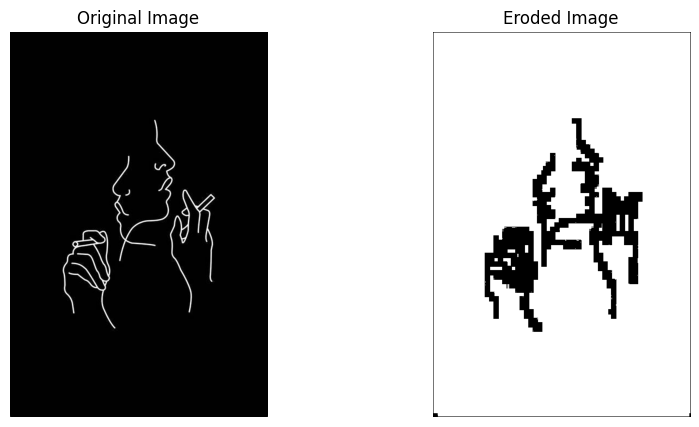

In [11]:
# se = np.array([[1, 0, 0],
#               [0, 0, 0],
#               [0, 1, 0]], dtype=np.uint8)

eroded_result = erode(g, se)
plot_images(g, eroded_result, 'Eroded Image')

In [12]:
def dilate(image, kernel):
    img_height, img_width = image.shape
    kernel_height, kernel_width = kernel.shape

    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=0)
    dilated_image = np.zeros_like(image)

    for i in range(img_height):
        for j in range(img_width):
            region = padded_image[i:i + kernel_height, j:j + kernel_width]
            if np.any(region[kernel == 1] == 1):
                dilated_image[i, j] = 1
            else:
                dilated_image[i, j] = 0

    return dilated_image

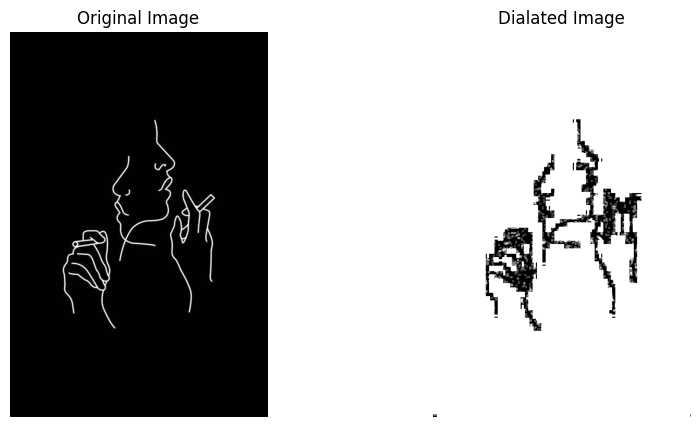

In [13]:
dil_result = dilate(g, se)
plot_images(g,dil_result, 'Dialated Image')

In [14]:
def opening(image, se):
    eroded_image = erode(image,se)
    opened_image = dilate(eroded_image, se)
    return opened_image

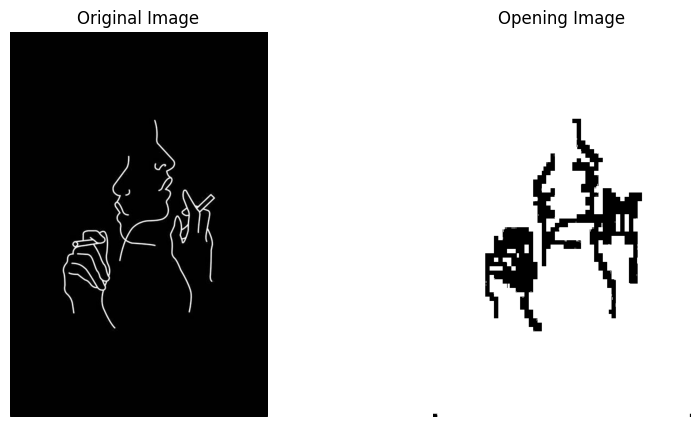

In [15]:
o = opening(g, se)
plot_images(g,o, 'Opening Image')

In [16]:
def closing(image, se):
    dilated_image = dilate(image, se)
    closed_image = erode(dilated_image, se)
    return closed_image

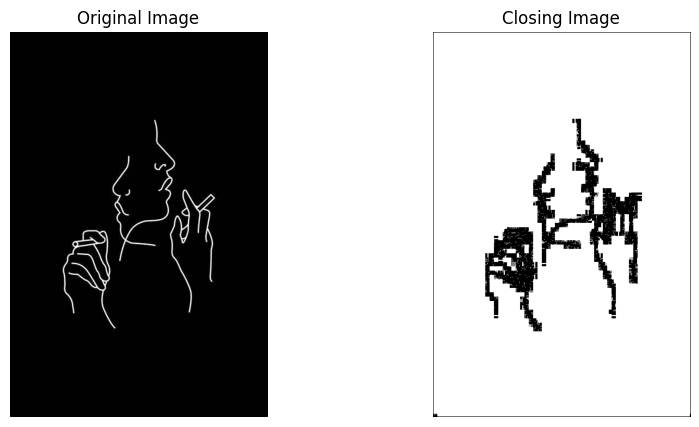

In [17]:
c = closing(g, se)
plot_images(g,c, 'Closing Image')

In [18]:
def hit_and_miss(image, fg_kernel, bg_kernel):
    c_img = 1 - image
    eroded_fg = erode(image, fg_kernel)
    eroded_bg = erode(c_img, bg_kernel)
    result = np.logical_and(eroded_fg, eroded_bg).astype(np.uint8)

    return result

In [19]:
fg_kernel = np.array([[0, 0, 0, 0, 0],
                      [0, 0, 0, 0, 0],
                      [0, 0, 1, 0, 0],
                      [0, 0, 0, 0, 0],
                      [0, 0, 0, 0, 0]])

bg_kernel = np.array([[0, 0, 0, 0, 0],
                      [0, 0, 0, 0, 0],
                      [0, 0, 0, 0, 0],
                      [0, 0, 0, 0, 0],
                      [0, 1, 1, 1, 0]])

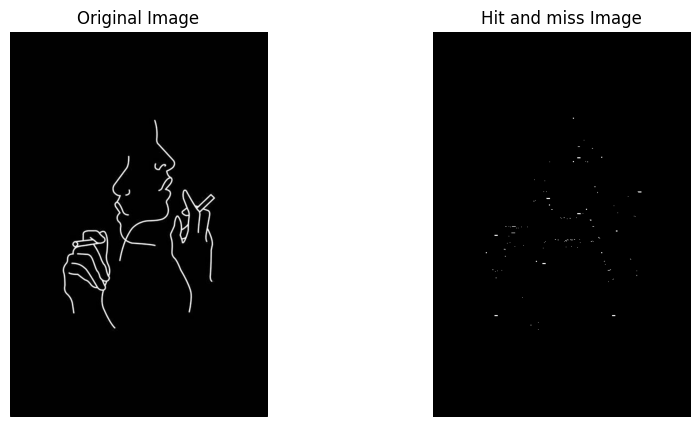

In [20]:
hm = hit_and_miss(g, fg_kernel, bg_kernel)
plot_images(g,hm, 'Hit and miss Image')

In [21]:
g.shape

(710, 474)

In [22]:
def binary(a, t=128):
    b = (a> t).astype(int)
    return b
n=binary(g,t=128)

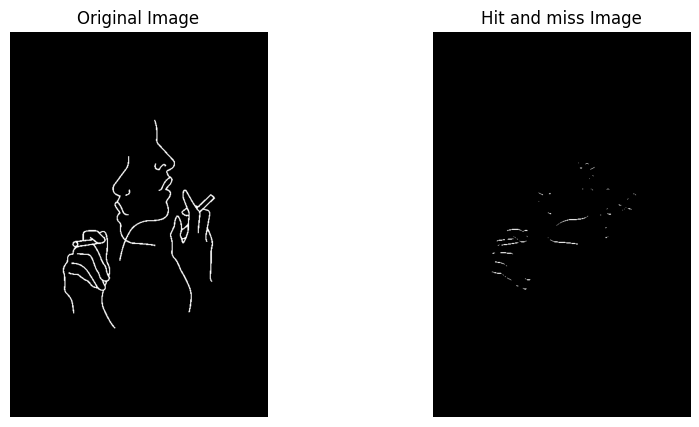

In [23]:
fg_kernel = np.array([[0, 0, 0, 0, 0],
                      [0, 0, 0, 0, 0],
                      [0, 0, 0, 0, 0],
                      [0, 0, 0, 0, 0],
                      [0, 1, 1, 1, 0]])

bg_kernel = np.array([[0, 0, 0, 0, 0],
                      [0, 0, 0, 0, 0],
                      [0, 1, 1, 1, 0],
                      [0, 0, 0, 0, 0],
                      [0, 0, 0, 0, 0]])
hm = hit_and_miss(n, fg_kernel, bg_kernel)
plot_images(n,hm, 'Hit and miss Image')

### **Coloured image**

In [24]:
image_path = "/content/test_cat2.jpg"
img = cv2.imread(image_path,1)

In [25]:
img.shape

(455, 728, 3)

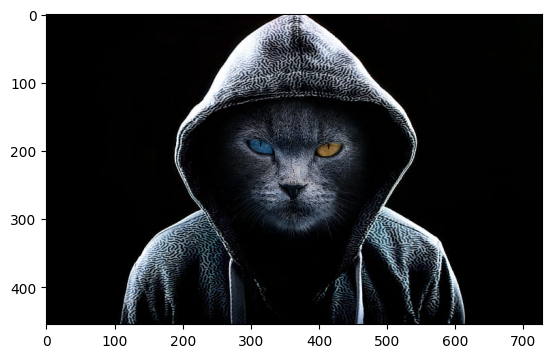

In [26]:
plt.imshow(img)

In [40]:
def erode_colored(image, kernel):
    img_height, img_width, num_channels = image.shape
    kernel_height, kernel_width = kernel.shape

    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width), (0, 0)), mode='constant', constant_values=0)
    eroded_image = np.zeros_like(image)

    for c in range(num_channels):       #channnels
        for i in range(img_height):
            for j in range(img_width):
                region = padded_image[i:i + kernel_height, j:j + kernel_width, c]
                if np.sum(region[kernel == 1]) > np.sum(kernel) // 2:
                    eroded_image[i, j, c] = 1
                else:
                    eroded_image[i, j, c] = 0

    return eroded_image

In [28]:
def plot1(original, filtered, title_filtered):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(original)
    plt.title('Original Image')
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(filtered)
    plt.title(title_filtered)
    plt.axis('off')
    plt.show()

In [39]:
def create_square_structuring_element(size=5):
    if size % 2 == 0:
        raise ValueError("Size must be an odd integer.")
    element = np.ones((size, size), dtype=np.uint8)
    return element

In [41]:
kernel = create_square_structuring_element()

In [42]:
kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [45]:
def erode_colored(image, kernel):
    img_height, img_width, num_channels = image.shape
    kernel_height, kernel_width = kernel.shape

    pad_height = kernel_height // 2
    pad_width = kernel_width // 2
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width), (0, 0)), mode='constant', constant_values=255)
    eroded_image = np.zeros_like(image)

    for c in range(num_channels):  # channels
        for i in range(img_height):
            for j in range(img_width):
                region = padded_image[i:i + kernel_height, j:j + kernel_width, c]
                eroded_image[i, j, c] = np.min(region[kernel == 1])

    return eroded_image

In [46]:
eroded_image = erode_colored(img, kernel)

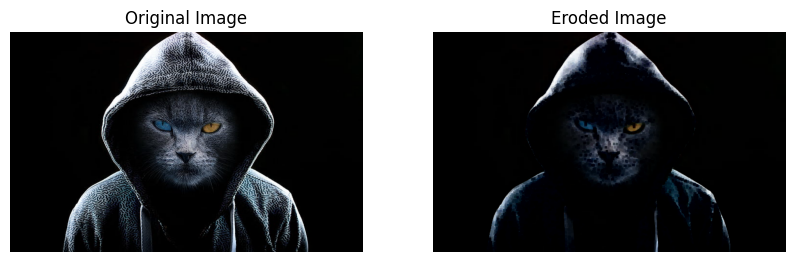

In [47]:
plot1(img, eroded_image, "Eroded Image")

In [48]:
def dilate_colored(image, kernel):
    img_height, img_width, num_channels = image.shape
    kernel_height, kernel_width = kernel.shape

    pad_height = kernel_height // 2
    pad_width = kernel_width // 2
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width), (0, 0)), mode='constant', constant_values=0)
    dilated_image = np.zeros_like(image)

    for c in range(num_channels):  # Channels
        for i in range(img_height):
            for j in range(img_width):
                region = padded_image[i:i + kernel_height, j:j + kernel_width, c]
                dilated_image[i, j, c] = np.max(region[kernel == 1])

    return dilated_image

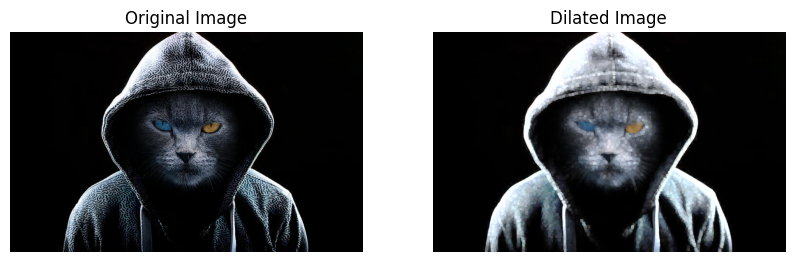

In [50]:
dilated_image = dilate_colored(img, kernel)
plot1(img, dilated_image, "Dilated Image")

In [52]:
def opening_colored(image, se):
    ei = erode_colored(image, se)
    oi = dilate_colored(ei, se)
    return oi

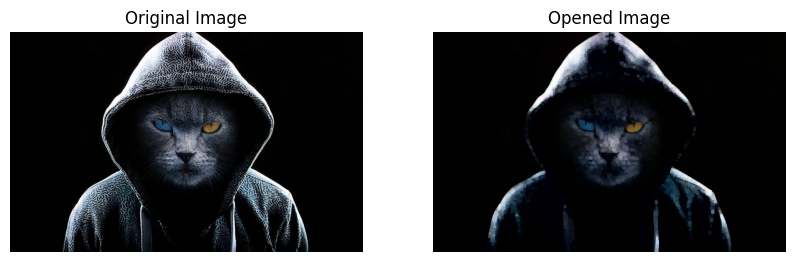

In [53]:
opened_image = opening_colored(img, kernel)
plot1(img, opened_image, "Opened Image")

In [54]:
def closing_colored(image, se):
    di = dilate_colored(image, se)
    ci = erode_colored(di, se)
    return ci

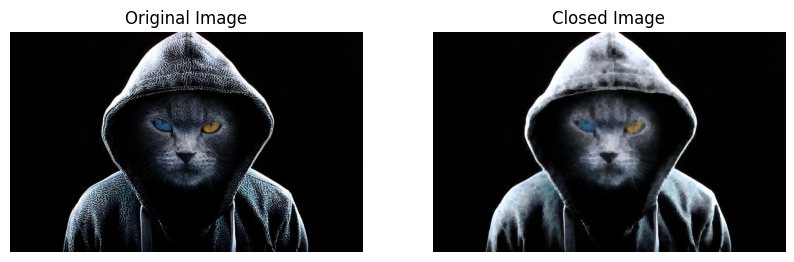

In [55]:
closed_image = closing_colored(img, kernel)
plot1(img, closed_image, "Closed Image")

In [61]:
def hit_and_miss_colored(image, fg_kernel, bg_kernel):
    img_height, img_width, num_channels = image.shape
    c_img = 1 - image
    result = np.zeros_like(image)

    for c in range(num_channels):  # channels
        eroded_fg = erode_colored(np.expand_dims(image[:, :, c], axis=2), fg_kernel)
        eroded_bg = erode_colored(np.expand_dims(c_img[:, :, c], axis=2), bg_kernel)
        result[:, :, c] = (np.logical_and(eroded_fg[:, :, 0], eroded_bg[:, :, 0])).astype(np.uint8) * 255

    return result

In [63]:
fg_kernel = create_square_structuring_element(3)
bg_kernel = create_square_structuring_element(3)

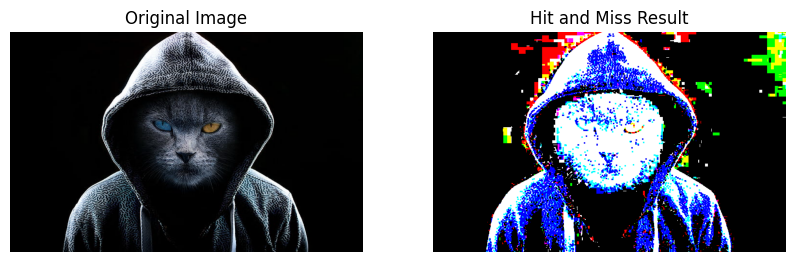

In [64]:
k = hit_and_miss_colored(img, fg_kernel, bg_kernel)
plot1(img,k, "Hit and Miss Result")

## Conclusion

In this experiment, we explored a variety of morphological operations, including erosion, dilation, opening, closing, and the hit-or-miss transform. These techniques are fundamental in image processing, enabling effective analysis and manipulation of binary images and colored images.

### Applications
- **Noise Reduction**: Morphological operations, especially erosion and opening, help remove small noise elements from binary images, leading to cleaner results.
- **Shape Analysis**: These techniques are useful for analyzing the shapes of objects within an image, which can be crucial for recognition tasks.
- **Object Detection**: The hit-or-miss transform can identify and isolate specific patterns or shapes, making it a powerful tool in computer vision.
- **Image Segmentation**: Morphological operations assist in segmenting different parts of an image based on their shapes and structures.
- **Feature Extraction**: They allow us to extract important features from binary images, facilitating further analysis and understanding.
- **Medical Imaging**: In the medical field, these techniques are applied to enhance and analyze images, contributing to better diagnosis and treatment planning.
